In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
%matplotlib Inline

In [92]:
df1 = pd.read_csv('train.csv')

In [93]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
df1.drop(['PassengerId','Name','Ticket','Cabin','Embarked','SibSp','Parch'], axis=1, inplace=True )

In [95]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [96]:
df1['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [97]:
df1['Age'].fillna(df1['Age'].mean(),inplace=True)

In [98]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [99]:
df_f=df1
l_sex_dummies=pd.get_dummies(df1['Sex'],drop_first=True)

In [100]:
df1= pd.concat([df1,l_sex_dummies],axis=1)

In [101]:
df1.head()

,Survived,Pclass,Sex,Age,Fare,male
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1


In [102]:
df1.drop(['Sex'], axis=1, inplace=True )

In [103]:
df1.head()

,Survived,Pclass,Age,Fare,male
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


In [104]:
from sklearn.preprocessing import StandardScaler
sts =StandardScaler()

In [105]:
feature_scale = ['Age','Fare']
df1[feature_scale] = sts.fit_transform(df1[feature_scale])

In [106]:
df1.head()

,Survived,Pclass,Age,Fare,male
0,0,3,-0.592481,-0.502445,1
1,1,1,0.638789,0.786845,0
2,1,3,-0.284663,-0.488854,0
3,1,1,0.407926,0.420730,0
4,0,3,0.407926,-0.486337,1


In [107]:
X=df1.drop(['Survived'],axis=1)
y=df1['Survived']

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [109]:
#create param
model_param = {
         
    'SVC_rbf':{
        'model':SVC(),
        'param':{
            'kernel':['rbf'],
            'C': [0.01,0.1, 1, 10, 100],
            'gamma' :np.logspace(-2,1,50)
        }
}
}

In [110]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [111]:
df_model_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_model_score

,model,best_score,best_params
0,SVC_rbf,0.812586,"{'C': 10, 'gamma': 0.3906939937054617, 'kernel..."


In [112]:
model_svc = SVC( C= 10,kernel='rbf')

In [113]:
model_svc.fit(X, y)

SVC(C=10)

In [114]:
df2 = pd.read_csv('test.csv')

In [115]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [116]:
df3=df2.drop(['PassengerId','Name','Ticket','Cabin','Embarked','SibSp','Parch'], axis=1 )

In [117]:
df3.isnull().sum()

Pclass     0
Sex        0
Age       86
Fare       1
dtype: int64

In [118]:
df3['Age'].fillna(df3['Age'].mean(),inplace=True)
df3['Fare'].fillna(df3['Fare'].mean(),inplace=True)

In [119]:
l_sex_dummies=pd.get_dummies(df3['Sex'],drop_first=True)
df3= pd.concat([df3,l_sex_dummies],axis=1)
df3.drop(['Sex'], axis=1, inplace=True )

In [120]:
df3.head()

,Pclass,Age,Fare,male
0,3,34.5,7.8292,1
1,3,47.0,7.0000,0
2,2,62.0,9.6875,1
3,3,27.0,8.6625,1
4,3,22.0,12.2875,0


In [121]:
df3[feature_scale] = sts.fit_transform(df3[feature_scale])

In [122]:
df3.head()

,Pclass,Age,Fare,male
0,3,0.334993,-0.498407,1
1,3,1.325530,-0.513274,0
2,2,2.514175,-0.465088,1
3,3,-0.259330,-0.483466,1
4,3,-0.655545,-0.418471,0


In [123]:
y_predicted = model_svc.predict(df3)

In [124]:
submission = pd.DataFrame({
        "PassengerId": df2['PassengerId'],
        "Survived": y_predicted
    })

In [125]:
submission.to_csv('EE20B042_PREDICTION_rbf.csv', index=False)


In [126]:
X=df1.drop(['Survived'],axis=1)
y=df1['Survived']

In [127]:
model_param = {
         'SVC_linear':{
        'model':SVC(),
        'param':{
            'kernel':['linear'],
            'C': [0.01,0.1, 1, 10],
            'gamma' :np.logspace(-3, 0, 10)
        }
    }
}

In [128]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [129]:
df_model_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_model_score

,model,best_score,best_params
0,SVC_linear,0.786737,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}"


In [130]:
model_svc = SVC( C= 0.1,kernel='linear')

In [131]:
model_svc.fit(X, y)

SVC(C=0.1, kernel='linear')

In [132]:
y_predicted = model_svc.predict(df3)

In [133]:
submission = pd.DataFrame({
        "PassengerId": df2['PassengerId'],
        "Survived": y_predicted
})

In [134]:
submission.to_csv('EE20B042_PREDICTION_linear.csv', index=False)

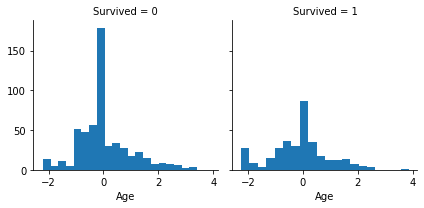

C:\Users\chitr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


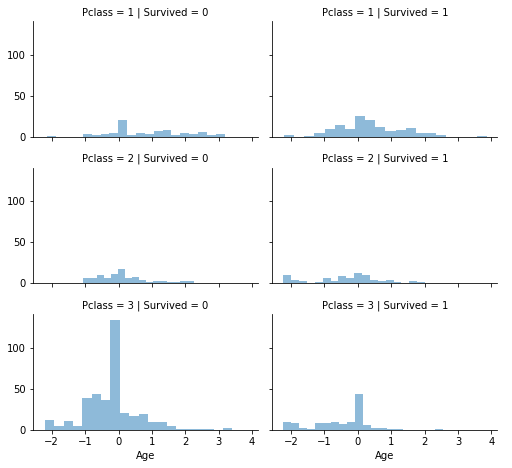

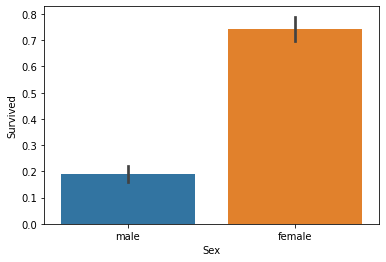

In [135]:
g = sns.FacetGrid(df1, col='Survived')
g.map(plt.hist, 'Age', bins=20)
plt.show()

grid = sns.FacetGrid(df1, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
plt.show()

sns.barplot(x='Sex', y='Survived', data=df_f)
plt.show()